### PRAKTIKUM


1.   Library Program Decision Tree





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2.   Loading Dataset



*   Membaca file CSV menggunakan Panda




In [3]:
# memmbaca file csv menggunakan pandas
df = pd.read_csv('/content/drive/MyDrive/Praktikum_ML/Praktikum05/data/stunting_wasting_dataset.csv')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


*  Menampilkan informasi detail dengan df.info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


3.  Data Prepocessing



*  Cek Misiing Value

In [5]:
# Cek missing value
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


*  Cek dan Hapus Data Duplikat

In [6]:
# Cek duplicate
df.duplicated().sum()

np.int64(7308)

In [7]:
# Menghapus data duplikat
df = df.drop_duplicates()

In [8]:
# Cek duplicate ulang setelah menghapus
df.duplicated().sum()

np.int64(0)

*  Mengubah Nama Kolom (Rename Columns)


In [9]:
df = df.rename(columns={
'Jenis Kelamin' : 'jenis_kelamin',
'Umur (bulan)' : 'umur_bulan',
'Tinggi Badan (cm)': 'tinggi_cm',
'Berat Badan (kg)' : 'berat_kg',
'Stunting' : 'stunting',
'Wasting' : 'wasting'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92692 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   jenis_kelamin  92692 non-null  object 
 1   umur_bulan     92692 non-null  int64  
 2   tinggi_cm      92692 non-null  float64
 3   berat_kg       92692 non-null  float64
 4   stunting       92692 non-null  object 
 5   wasting        92692 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.0+ MB


4. Data Understanding (Exploratory Data Analysis)

*  Visualisasi Distribusi Label Target (Stunting)


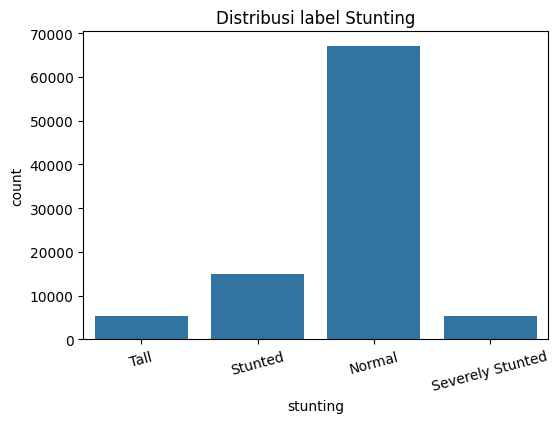

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='stunting', data=df)
plt.title('Distribusi label Stunting')
plt.xticks(rotation=15)
plt.show()

5. Encoding Data Kategorikal (Mapping Label ke Kode Numerik)

In [11]:
# mapping label -> kode untuk target
stunting_classes = list(df['stunting'].astype('category').cat.categories) # Get categories before encoding
df['stunting'] = df['stunting'].astype('category').cat.codes


# fitur categorical lain
for col in ['jenis_kelamin', 'wasting']:
  if col in df.columns:
    df[col] = df[col].astype('category').cat.codes
df.head()

,jenis_kelamin,umur_bulan,tinggi_cm,berat_kg,stunting,wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


6. Analisis Korelasi Antar Fitur

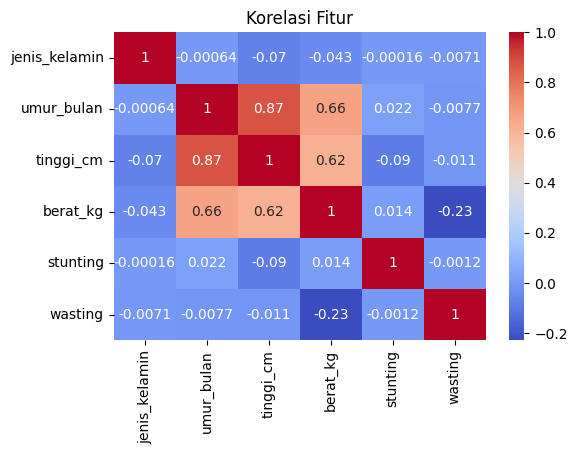

In [12]:
# Korelasi
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

7. Splitting Data (Pembagian Data Training dan Testing)

In [13]:
# Memilih fitur dan target
feature_cols = ['umur_bulan', 'tinggi_cm', 'berat_kg', 'wasting']
X = df[feature_cols]
y = df['stunting']

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
    )
len(X_train), len(X_test)

(74153, 18539)

8. Pembuatan Model Decision Tree

In [14]:
# Membangun model
dt = DecisionTreeClassifier(
   criterion='gini',
   max_depth=4,
   random_state=42
   )
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

9. Evaluasi Model Decision Tree

In [15]:
# Evaluasi
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 21), "%")
print("\nConfussion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=stunting_classes))

Akurasi: 77.66869841954798 %

Confussion Matrix:
 [[12901     0   481    29]
 [  587    25   455     0]
 [ 1653     0  1355     0]
 [  935     0     0   118]]

Classification Report:
                   precision    recall  f1-score   support

          Normal       0.80      0.96      0.88     13411
Severely Stunted       1.00      0.02      0.05      1067
         Stunted       0.59      0.45      0.51      3008
            Tall       0.80      0.11      0.20      1053

        accuracy                           0.78     18539
       macro avg       0.80      0.39      0.41     18539
    weighted avg       0.78      0.78      0.73     18539



10. Visualisasi Hasil Model Decision Tree

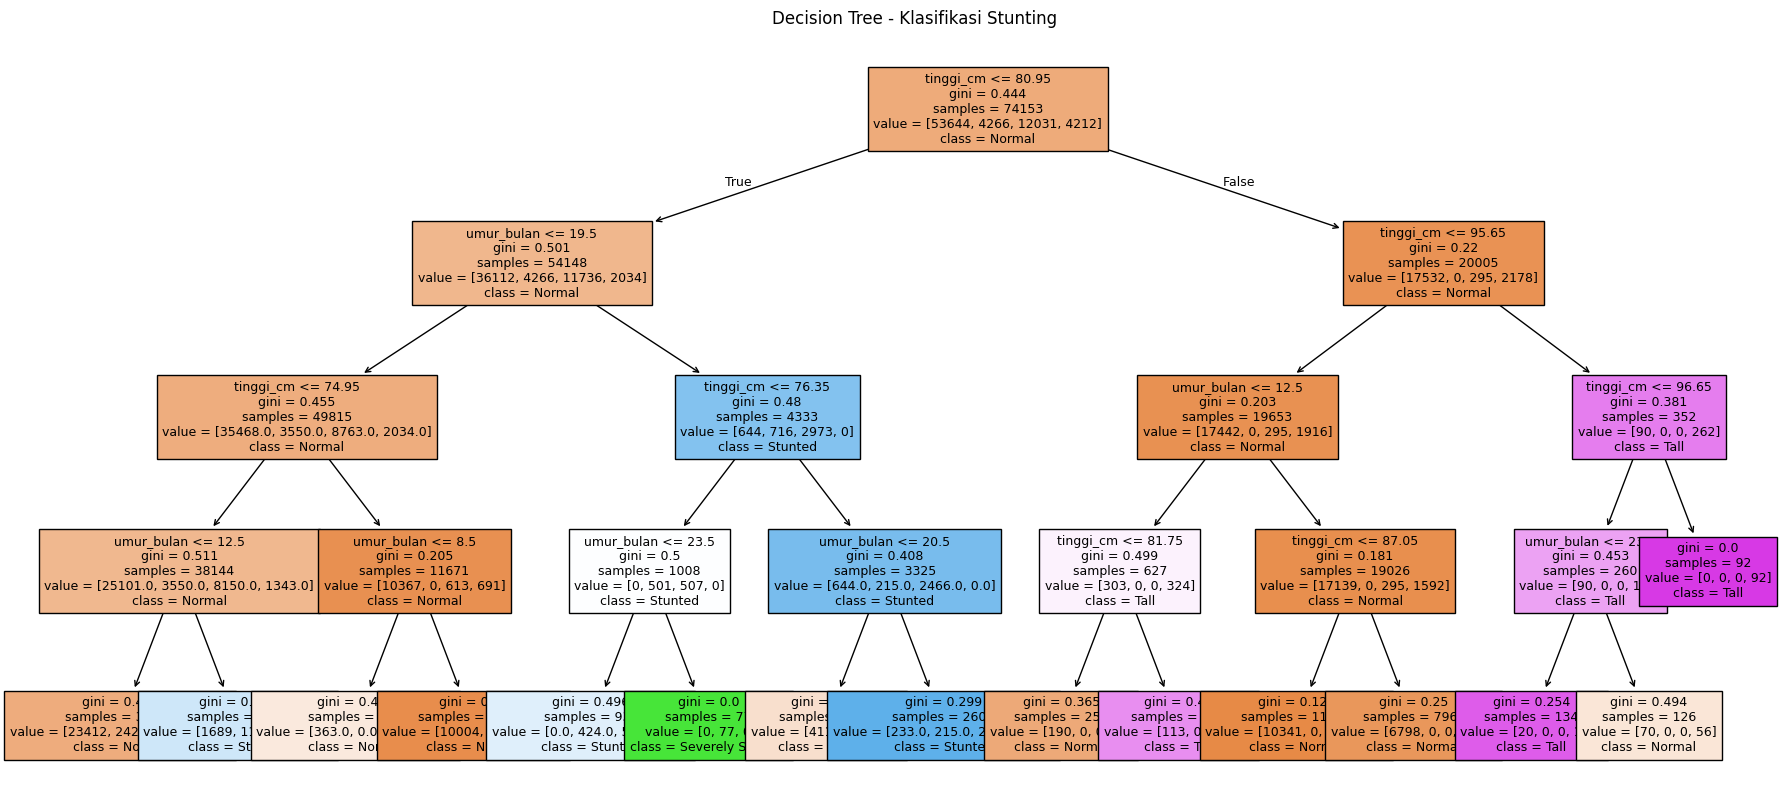

In [16]:
# Visualisasi model
plt.figure(figsize=(22,10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=stunting_classes, #kembali ke nama asli
    filled=True,
    fontsize=9
)
plt.title("Decision Tree - Klasifikasi Stunting")
plt.show()

11. Feature Importance (Fitur yang Paling Berpengaruh)

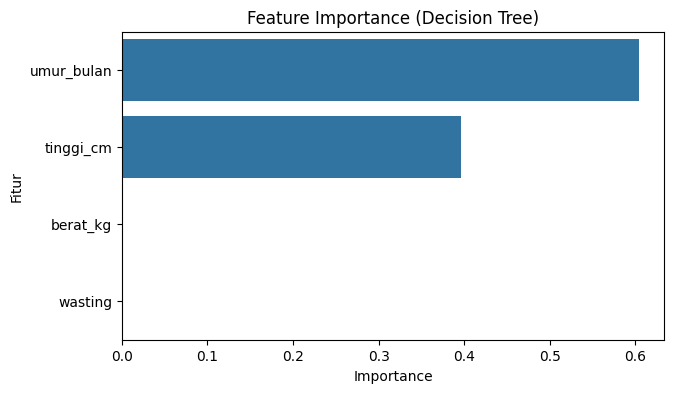

,0
umur_bulan,0.603752
tinggi_cm,0.396248
berat_kg,0.000000
wasting,0.000000


In [17]:
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp

12. Hyperparameter Tuning (Menentukan max_depth Terbaik)

In [18]:
scores = {}
for d in range(2, nine := 9):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d]*100, 2), "%")

Best max_depth: 8 | Acc: 84.22 %


## PRAKTIKUM MANDIRI

1. Membaca file CSV

In [19]:
df = pd.read_csv('/content/drive/MyDrive/Praktikum_ML/Praktikum05/data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


2. Menampilkan informasi detail dengan df.info()


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


3. Cek missing value

In [21]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


4. Cek duplikat

In [22]:
df.duplicated().sum()

np.int64(0)

5. Mengubah Nama Kolom (Rename Columns)

In [23]:
df = df.rename(columns={
    'Id'             : 'id',
    'SepalLengthCm'  : 'sepal_length_cm',
    'SepalWidthCm'   : 'sepal_width_cm',
    'PetalLengthCm'  : 'petal_length_cm',
    'PetalWidthCm'   : 'petal_width_cm',
    'Species'        : 'species'
    })

# Menjalankan df.info() untuk melihat perubahan nama kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               150 non-null    int64  
 1   sepal_length_cm  150 non-null    float64
 2   sepal_width_cm   150 non-null    float64
 3   petal_length_cm  150 non-null    float64
 4   petal_width_cm   150 non-null    float64
 5   species          150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


6. Exploratory Data Analysis (EDA)

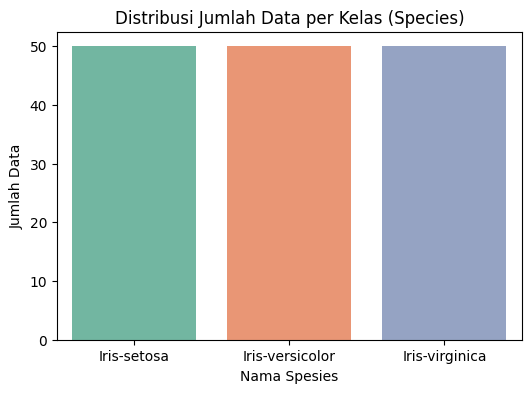

In [24]:
# Visualisasi distribusi target (Species)
plt.figure(figsize=(6,4))
sns.countplot(x="species", data=df, hue="species", palette="Set2", legend=False)
plt.title("Distribusi Jumlah Data per Kelas (Species)")
plt.xlabel("Nama Spesies")
plt.ylabel("Jumlah Data")
plt.show()

7. Encoding Data Kategorikal (Mapping Label ke Kode Numerik)

In [25]:
# Mapping label target (species)
species_classes = list(df['species'].astype('category').cat.categories)
df['species'] = df['species'].astype('category').cat.codes

print("Mapping Label Target:")
for i, c in enumerate(species_classes):
    print(f"{i} = {c}")

df.head()

Mapping Label Target:
0 = Iris-setosa
1 = Iris-versicolor
2 = Iris-virginica


,id,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


8. Analisis Korelasi Antar Fitur

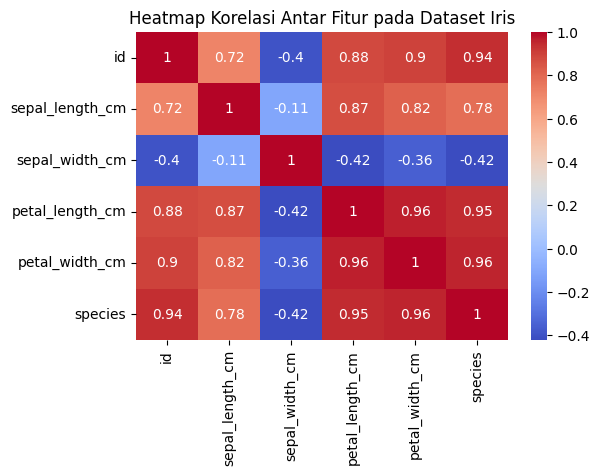

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Fitur pada Dataset Iris")
plt.show()

9. Splitting Data (Pembagian Data Training dan Testing)

In [27]:
# Menentukan fitur (X) dan target (y)
X = df[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']]
y = df['species']

# Membagi dataset menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

len(X_train), len(X_test)

(120, 30)

10. Pembuatan Model Decision Tree

In [28]:
# Membangun model
dt = DecisionTreeClassifier(
   criterion='gini',
   max_depth=4,
   random_state=42
   )
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

11. Evaluasi Model Decision Tree

In [29]:
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n",
      classification_report(y_test, y_pred, target_names=species_classes))

Akurasi: 93.33 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



12. Visualisasi Model

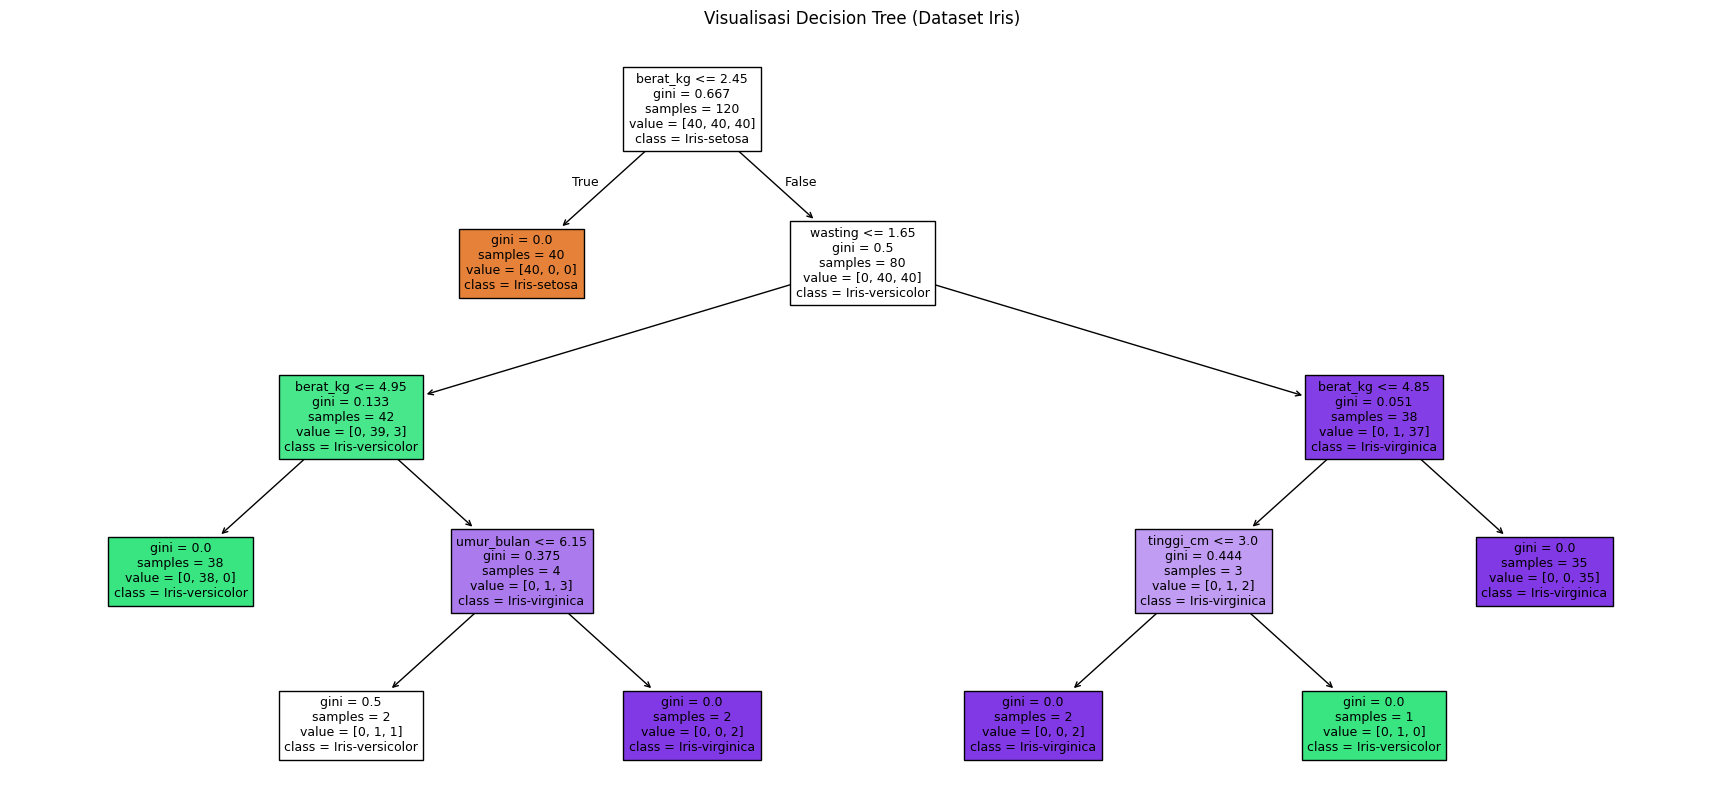

In [30]:
# Visualisasi model
plt.figure(figsize=(22, 10))
plot_tree(
    dt,
    feature_names=feature_cols,          # nama kolom fitur
    class_names=species_classes,         # pakai nama kelas yang disimpan sebelumnya
    filled=True,
    fontsize=9
)
plt.title("Visualisasi Decision Tree (Dataset Iris)")
plt.show()

13. Fitur yang paling berpengaruh

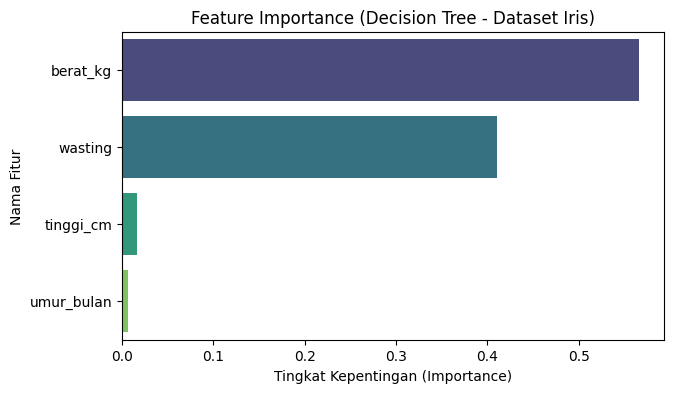

Nilai Feature Importance:


,0
berat_kg,0.565639
wasting,0.411154
tinggi_cm,0.016878
umur_bulan,0.006329


In [31]:
# Menghitung tingkat kepentingan (importance) setiap fitur
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)

# Visualisasi feature importance
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index, hue=imp.index, palette="viridis", legend=False)
plt.title("Feature Importance (Decision Tree - Dataset Iris)")
plt.xlabel("Tingkat Kepentingan (Importance)")
plt.ylabel("Nama Fitur")
plt.show()

# Menampilkan nilai importance setiap fitur
print("Nilai Feature Importance:")
display(imp)

14. Menentukan max_depth terbaik

In [32]:
# Dictionary untuk menyimpan hasil akurasi setiap nilai max_depth
scores = {}

# Uji model dengan variasi kedalaman pohon (2 sampai 8)
for d in range(2, 9):
    model_temp = DecisionTreeClassifier(
        criterion='gini',
        max_depth=d,
        random_state=42
    )
    model_temp.fit(X_train, y_train)
    acc = accuracy_score(y_test, model_temp.predict(X_test))
    scores[d] = acc
    print(f"max_depth = {d} | Akurasi = {round(acc * 100, 2)}%")

# Menentukan nilai max_depth terbaik
best_d = max(scores, key=scores.get)
print("\n✅ Best max_depth:", best_d, "| Akurasi:", round(scores[best_d] * 100, 2), "%")


max_depth = 2 | Akurasi = 93.33%
max_depth = 3 | Akurasi = 96.67%
max_depth = 4 | Akurasi = 93.33%
max_depth = 5 | Akurasi = 93.33%
max_depth = 6 | Akurasi = 93.33%
max_depth = 7 | Akurasi = 93.33%
max_depth = 8 | Akurasi = 93.33%

✅ Best max_depth: 3 | Akurasi: 96.67 %


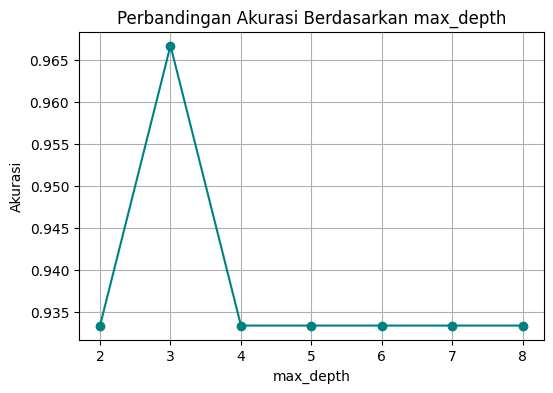

In [33]:
# Menampilkan dalam bentuk grafik
plt.figure(figsize=(6,4))
plt.plot(list(scores.keys()), list(scores.values()), marker='o', color='teal')
plt.title("Perbandingan Akurasi Berdasarkan max_depth")
plt.xlabel("max_depth")
plt.ylabel("Akurasi")
plt.grid(True)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!git config --global user.email "ariakristallnacht@gmail.com"
!git config --global user.name "Aria Kristallincht"

!git clone https://github.com/Ariakristallnacht/TI03_AriaKS_0110222076.git
%cd   TI03_AriaKS_0110222076

!cp -r /content/drive/MyDrive/Praktikum_ML/Praktikum04/ ./Praktikum04

!ls -lah

!git add .
!git commit -m "praktikum 4 ml"

from getpass import getpass
import os

token = getpass("Masukkan GitHub Token: ")

os.system(f'git remote set-url origin https://{token}@github.com/Ariakristallnacht/TI03_AriaKS_0110222076.git')

!git push origin main